## Libraries imports

In [1]:
!cp "/content/drive/MyDrive/Statapp/file_04_HMLasso.py" "HMLasso.py"

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # To standardize the data

import HMLasso as hml # Lasso with High Missing Rate

## Data imports

In [63]:
columns_types = pd.read_csv("/content/drive/MyDrive/Statapp/data_03_columns_types.csv")
data = pd.read_csv("/content/drive/MyDrive/Statapp/data_03.csv")

<ipython-input-63-1d21f6d3a7c2>:2: DtypeWarning: Columns (2684) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("/content/drive/MyDrive/Statapp/data_03.csv")


In [64]:
data_GHI = pd.read_csv("/content/drive/MyDrive/Statapp/data_tSNE_GHI.csv")
data_GHI.columns = ['HHIDPN', 'GHI1', 'GHI2', 'GHI3', 'GHI4', 'GHI5', 'GHI6', 'GHI7', 'GHI8', 'GHI9', 'GHI10', 'GHI11', 'GHI12', 'GHI13', 'GHI14']

We select users that are present in all waves. It will be easier to select useful variables.



In [65]:
criteria = data["INW1"]*data["INW2"]*data["INW3"]*data["INW4"]*data["INW5"]*data["INW6"]*data["INW7"]*data["INW8"]*data["INW9"]*data["INW10"]*data["INW11"]*data["INW12"]*data["INW13"]*data["INW14"]
data_all_waves = data.loc[criteria == 1]

In [66]:
data_all_waves.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 6 to 24850
Columns: 11429 entries, HHIDPN to R14IADL5H_5
dtypes: float64(11377), int64(51), object(1)
memory usage: 296.3 MB


In [67]:
data_all_waves.head()

,HHIDPN,R1MPART,R2MPART,R3MPART,R4MPART,R5MPART,R6MPART,R7MPART,R8MPART,R9MPART,...,R13IADL5H_2,R13IADL5H_3,R13IADL5H_4,R13IADL5H_5,R14IADL5H_0,R14IADL5H_1,R14IADL5H_2,R14IADL5H_3,R14IADL5H_4,R14IADL5H_5
6,10003030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
8,10004040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10,10013040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
11,10038010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12,10038040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [68]:
print([col for col in data_all_waves.columns if "GHI" in col])

['GHI1', 'GHI2', 'GHI3', 'GHI4', 'GHI5', 'GHI6', 'GHI7', 'GHI8', 'GHI9', 'GHI10', 'GHI11', 'GHI12', 'GHI13', 'GHI14']


In [69]:
data_GHI.head()

,HHIDPN,GHI1,GHI2,GHI3,GHI4,GHI5,GHI6,GHI7,GHI8,GHI9,GHI10,GHI11,GHI12,GHI13,GHI14
0,1010,46.338680,68.969490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010,64.833760,-13.297101,27.734835,43.220688,44.066593,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3010,22.931510,-66.686300,-29.234972,13.921358,-91.249150,-44.982487,-73.210106,-93.987110,-26.113197,-49.452682,-13.593910,NaN,NaN,NaN
3,3020,87.220850,26.626232,-3.540929,-35.344840,5.839192,15.979321,87.244750,7.659104,7.514696,11.224237,6.606269,85.520730,NaN,NaN
4,10001010,16.348322,51.236960,-34.807380,16.018581,-20.836510,-49.169600,-41.571840,-27.421490,104.275900,-33.672630,-10.305906,-51.743675,-60.904327,NaN


In [70]:
data_all_waves = data_all_waves.drop(columns=[f'GHI{wave}' for wave in range(1, 15)])
data_all_waves = data_all_waves.drop(columns=[f'INW{wave}' for wave in range(1, 15)])

In [71]:
data = pd.merge(data_all_waves, data_GHI, on = "HHIDPN")

In [72]:
data.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3396 entries, 0 to 3395
Columns: 11415 entries, HHIDPN to GHI14
dtypes: float64(11377), int64(37), object(1)
memory usage: 295.9 MB


In [73]:
data.head()

,HHIDPN,R1MPART,R2MPART,R3MPART,R4MPART,R5MPART,R6MPART,R7MPART,R8MPART,R9MPART,...,GHI5,GHI6,GHI7,GHI8,GHI9,GHI10,GHI11,GHI12,GHI13,GHI14
0,10003030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,55.371532,35.888090,29.299238,22.797500,19.358074,77.432846,111.691956,-25.94662,103.435680,-5.838378
1,10004040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-91.421400,-112.308880,-105.389435,-90.203280,-83.431940,-93.363850,89.013370,-105.65158,-109.505350,-91.108025
2,10013040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,49.459797,65.680290,60.154457,39.245720,51.309025,60.598877,51.426174,46.48843,37.333424,103.510000
3,10038010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-57.609745,-47.364265,88.303375,-46.830162,-78.428740,-66.849754,-7.978823,-23.49985,-65.549740,-62.838780
4,10038040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-47.359974,-46.314903,-38.281940,-47.406548,98.821100,-40.059370,-7.615824,92.26157,-80.819400,-9.062362


## First idea: couples (HHIDPN, wave) are individuals

### Format database

We first select variables that are present in all waves

In [74]:
temporal_variables = {}
waves_columns = [col for col in data.columns if "genetic_" not in col and col[1] in "123456789"]
for col in waves_columns:
  char = col[0] # R or H
  if col[2] in "01234":
    wave = col[1:3]
    suffix = col[3:]
  else:
    wave = col[1]
    suffix = col[2:]
  variable = char + 'w' + suffix
  
  if variable not in temporal_variables.keys():
    temporal_variables[variable] = np.zeros((14), dtype=bool)
  
  temporal_variables[variable][int(wave)-1] = True

temporal_variables = pd.DataFrame(temporal_variables)

# We manually add "GHIw":
temporal_variables["GHIw"] = np.ones((14), dtype=bool)
waves_columns += [f"GHI{w}" for w in range(1,15)]

In [75]:
temporal_variables.head()

,RwMPART,RwMLEN,RwMCURLN,RwMLENM,RwMNEV,HwANYFIN,HwANYFAM,RwFAMR,RwFINR,HwHHRESP,...,RwADL6A_4.0,RwADL6A_5.0,RwADL6A_6.0,RwIADL5H_0,RwIADL5H_1,RwIADL5H_2,RwIADL5H_3,RwIADL5H_4,RwIADL5H_5,GHIw
0,True,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,False,False,False,False,False,False,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


Variables present in each waves are the following ones:

In [76]:
variables_in_all_waves = [col for col in temporal_variables.columns if temporal_variables[col].sum()==14]

Variables that are independant from the waves are the following ones:

In [77]:
non_waves_columns = [col for col in data.columns if col not in waves_columns]

In [78]:
def get_wave(df, wave):
  variables_of_wave = [var.replace('w', str(wave)) for var in variables_in_all_waves]
  returned_df = df[variables_of_wave + non_waves_columns]
  returned_df.columns = variables_in_all_waves + non_waves_columns
  returned_df["Wave"] = wave

  return returned_df

### Lasso selection

In [ ]:
data_for_lasso = pd.concat([get_wave(data, wave) for wave in range(1, 15)])
data_for_lasso = data_for_lasso.reset_index()

# We drop the variable "genetic_Section_A_or_E"
data_for_lasso = data_for_lasso.drop(columns = "genetic_Section_A_or_E")

In [105]:
X = data_for_lasso.drop(columns = ["GHIw", "HHIDPN", "PN", "HHID"]).values
y = data_for_lasso["GHIw"].values

<Axes: ylabel='Density'>

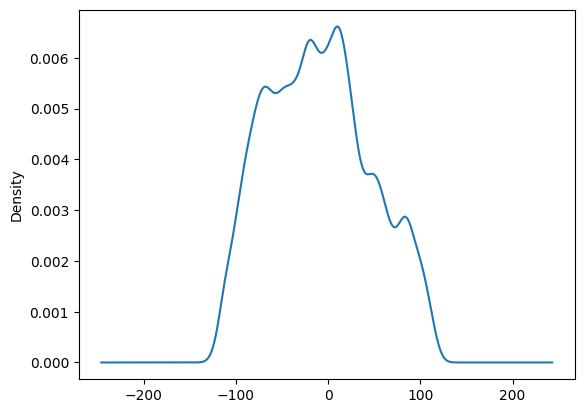

In [106]:
data_for_lasso["GHIw"].plot.density()

In [ ]:
y_scaled = y - y.mean()

scaler_X = StandardScaler()
X_scaled = scaler_X.fit_transform(X)

In [110]:
hml.ERRORS_HANDLING = "ignore"
lasso = hml.HMLasso(mu=100, verbose=True)
lasso.fit(X_scaled, y_scaled)

[Imputing parameters] Starting...
[Imputing parameters] R calculated.
[Imputing parameters] rho_pair calculated.
[Imputing parameters] S_pair calculated.
[Imputing parameters] Parameters imputed.
[First Problem] Starting...
[First Problem] Objective and constraints well-defined.
                                     CVXPY                                     
                                     v1.3.1                                    
(CVXPY) Apr 27 12:23:17 AM: Your problem has 592900 variables, 1 constraints, and 0 parameters.
(CVXPY) Apr 27 12:23:17 AM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Apr 27 12:23:17 AM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Apr 27 12:23:17 AM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compil

We arbitrarly select all variables whose coefficient is greater (in modulus) than 1e-9

In [139]:
columns_for_lasso = data_for_lasso.drop(columns = ["GHIw", "HHIDPN", "PN", "HHID"]).columns

In [149]:
criteria = pd.Series(abs(lasso.beta_opt) > 1e-9)
columns_to_keep = list(pd.Series(columns_for_lasso)[criteria.index[criteria]])

### Gradient boosting

In [150]:
data_for_boosting = data_for_lasso[columns_to_keep + ["GHIw", "HHIDPN", "PN", "HHID"]]

In [151]:
data_for_boosting.shape

(47544, 112)

In [152]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [153]:
X = data_for_boosting.drop(columns = ["GHIw", "HHIDPN", "PN", "HHID"]).values
y = data_for_boosting["GHIw"].values

y_scaled = y - y.mean()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state = 5)

In [187]:
from sklearn.model_selection import GridSearchCV

params = {"learning_rate" : [0.05, 0.1, 0.2, 0.3, 0.5, 1.0],
          "max_iter" : [100, 500, 1000, 2000],
          "max_leaf_nodes" : [31, 100]}

grid = GridSearchCV(estimator = HistGradientBoostingRegressor(),
                    param_grid = params,
                    scoring = "r2",
                    n_jobs = -1,
                    cv = 5,
                    verbose = 5)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=HistGradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.2, 0.3, 0.5, 1.0],
                         'max_iter': [100, 500, 1000, 2000],
                         'max_leaf_nodes': [31, 100]},
             scoring='r2', verbose=5)

In [189]:
results = pd.DataFrame(grid.cv_results_)
results = results.drop(columns = [col for col in results.columns if "split" in col]+["params"]).sort_values("rank_test_score")
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
7,24.770315,3.487579,0.749571,0.240712,0.05,2000,100,0.211774,0.004945,1
11,13.871222,1.783630,0.387445,0.065120,0.1,500,100,0.207428,0.003496,2
3,20.105510,4.805623,0.611283,0.156409,0.05,500,100,0.206051,0.005055,3
5,21.292338,6.905940,0.702577,0.211307,0.05,1000,100,0.204851,0.008835,4
15,11.397437,1.163469,0.334472,0.022021,0.1,2000,100,0.203847,0.004698,5


These results above say that maybe we could try an even greater model.

In [190]:
params = {"learning_rate" : [0.01, 0.05, 0.1],
          "max_iter" : [500, 1000, 2000],
          "max_leaf_nodes" : [100, 200]}

grid = GridSearchCV(estimator = HistGradientBoostingRegressor(),
                    param_grid = params,
                    scoring = "r2",
                    n_jobs = -1,
                    cv = 5,
                    verbose = 5)

grid.fit(X_train, y_train)

results = pd.DataFrame(grid.cv_results_)
results = results.drop(columns = [col for col in results.columns if "split" in col]+["params"]).sort_values("rank_test_score")
results.head()

Fitting 5 folds for each of 18 candidates, totalling 90 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_iter,param_max_leaf_nodes,mean_test_score,std_test_score,rank_test_score
9,34.371790,7.426177,0.772651,0.177897,0.05,1000,200,0.217263,0.004511,1
7,34.782594,5.653461,0.849768,0.319940,0.05,500,200,0.216299,0.004148,2
5,116.297439,16.279735,2.344506,0.317973,0.01,2000,200,0.212783,0.006183,3
10,23.658371,3.062607,0.820179,0.209685,0.05,2000,100,0.212388,0.004854,4
11,29.270612,2.644396,0.615418,0.140716,0.05,2000,200,0.211975,0.007054,5


According to the results above, we re-train a booster with the right parameters.

In [191]:
booster = HistGradientBoostingRegressor(loss = "squared_error",
                                        learning_rate = 0.05,
                                        max_iter = 1000,
                                        max_leaf_nodes = 200)
booster.fit(X_train, y_train)

HistGradientBoostingRegressor(learning_rate=0.05, max_iter=1000,
                              max_leaf_nodes=200)

In [192]:
print("train score : ", str(booster.score(X_train, y_train)))
print("test score : ", str(booster.score(X_test, y_test)))

train score :  0.5200100079727117
test score :  0.20455680862304393


We shall compare these results with a simple linear regression

In [196]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [198]:
imputer = IterativeImputer(verbose=2)
X_imputed = imputer.fit_transform(X_train)

[IterativeImputer] Completing matrix with shape (38035, 108)
[IterativeImputer] Ending imputation round 1/10, elapsed time 56.07
[IterativeImputer] Change: 10.968134686900058, scaled tolerance: 0.09804537032215214 
[IterativeImputer] Ending imputation round 2/10, elapsed time 111.92
[IterativeImputer] Change: 2.246495578352265, scaled tolerance: 0.09804537032215214 
[IterativeImputer] Ending imputation round 3/10, elapsed time 165.42
[IterativeImputer] Change: 1.7471293314737866, scaled tolerance: 0.09804537032215214 
[IterativeImputer] Ending imputation round 4/10, elapsed time 221.69
[IterativeImputer] Change: 1.268221945923569, scaled tolerance: 0.09804537032215214 
[IterativeImputer] Ending imputation round 5/10, elapsed time 280.74
[IterativeImputer] Change: 0.9321360588003254, scaled tolerance: 0.09804537032215214 
[IterativeImputer] Ending imputation round 6/10, elapsed time 333.94
[IterativeImputer] Change: 0.6993041065365622, scaled tolerance: 0.09804537032215214 
[IterativeIm

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [200]:
X_test_imputed = imputer.fit_transform(X_test)

[IterativeImputer] Completing matrix with shape (9509, 108)
[IterativeImputer] Ending imputation round 1/10, elapsed time 20.77
[IterativeImputer] Change: 6.043710808357461, scaled tolerance: 0.08458915406333499 
[IterativeImputer] Ending imputation round 2/10, elapsed time 37.44
[IterativeImputer] Change: 1.4389058062150775, scaled tolerance: 0.08458915406333499 
[IterativeImputer] Ending imputation round 3/10, elapsed time 56.66
[IterativeImputer] Change: 1.0191940158186308, scaled tolerance: 0.08458915406333499 
[IterativeImputer] Ending imputation round 4/10, elapsed time 74.79
[IterativeImputer] Change: 0.7482123742696806, scaled tolerance: 0.08458915406333499 
[IterativeImputer] Ending imputation round 5/10, elapsed time 93.32
[IterativeImputer] Change: 0.5627613757797728, scaled tolerance: 0.08458915406333499 
[IterativeImputer] Ending imputation round 6/10, elapsed time 110.73
[IterativeImputer] Change: 0.4502921404889489, scaled tolerance: 0.08458915406333499 
[IterativeImpute

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [207]:
from sklearn.linear_model import Ridge
alpha = 0.1
ridge = Ridge(alpha = alpha)
ridge.fit(X_imputed, y_train)

from sklearn.metrics import r2_score
print("Ridge, alpha = " + str(alpha))
print("train score : " + str(r2_score(y_train, ridge.predict(X_imputed))))
print("test score : " + str(r2_score(y_test, ridge.predict(X_test_imputed))))

Ridge, alpha = 0.1
train score : 0.13863279157031327
test score : 0.12352014083694585


In [206]:
from sklearn.linear_model import Lasso
alpha = 0.1
lasso = Lasso(alpha = alpha)
lasso.fit(X_imputed, y_train)

from sklearn.metrics import r2_score
print("Lasso, alpha = " + str(alpha))
print("train score : " + str(r2_score(y_train, lasso.predict(X_imputed))))
print("test score : " + str(r2_score(y_test, lasso.predict(X_test_imputed))))

Lasso, alpha = 0.1
train score : 0.1374190410422953
test score : 0.12424316978952143
